_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
(1) Temperatura média de cada dia
(2) Guardar tabela meteorológica
(3) Carregar tabela meterorológica
(4) Temperatura mínima mais baixa
(5) Amplitude térmica de cada dia
(6) Dia com valor máximo de precicipitação
(7) Dias em que a precipitação foi superior a p (escolhido por si)
(8) Dias consecutivos com precipitação abaixo de p (escolhido por si)
(9) Gráficos da temperatura máxima, mínima e da pluviosidade
(0) Sair da aplicação
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

Tabela meteorológica: [((2025, 10, 21), 1, 

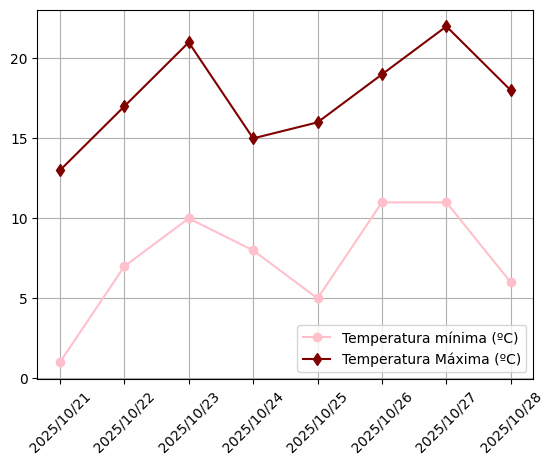

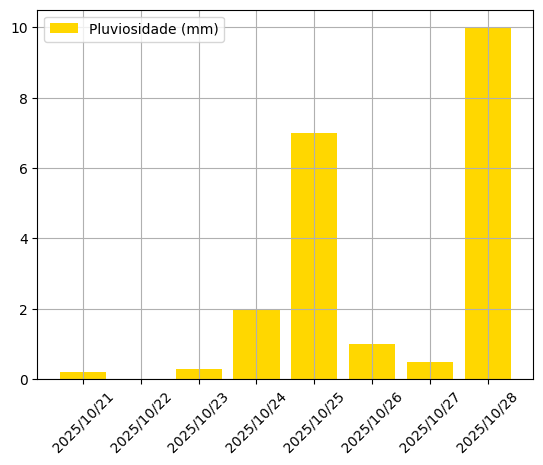

None
_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
(1) Temperatura média de cada dia
(2) Guardar tabela meteorológica
(3) Carregar tabela meterorológica
(4) Temperatura mínima mais baixa
(5) Amplitude térmica de cada dia
(6) Dia com valor máximo de precicipitação
(7) Dias em que a precipitação foi superior a p (escolhido por si)
(8) Dias consecutivos com precipitação abaixo de p (escolhido por si)
(9) Gráficos da temperatura máxima, mínima e da pluviosidade
(0) Sair da aplicação
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

Tabela meteorológica: [((2025, 10, 21)

KeyboardInterrupt: Interrupted by user

In [ ]:
# TabMeteo = [(Data,TempMin,TempMax,Precipitacao)]
    # Data = (Int,Int,Int)
    # TempMin = Float
    # TempMax = Float
    # Precipitacao = Float

Tabela_meteo_1 = [((2025,10,21), 1, 13, 0.2), ((2025,10,22), 7, 17, 0.01), ((2025,10,23), 10, 21, 0.3), ((2025,10,24), 8, 15, 2), ((2025,10,25), 5, 16, 7), ((2025,10,26), 11, 19, 1), ((2025,10,27), 11, 22, 0.5), ((2025,10,28), 6, 18, 10)]

def menu(): # menu
    print("""_____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
(1) Temperatura média de cada dia
(2) Guardar tabela meteorológica
(3) Carregar tabela meterorológica
(4) Temperatura mínima mais baixa
(5) Amplitude térmica de cada dia
(6) Dia com valor máximo de precicipitação
(7) Dias em que a precipitação foi superior a p (escolhido por si)
(8) Dias consecutivos com precipitação abaixo de p (escolhido por si)
(9) Gráficos da temperatura máxima, mínima e da pluviosidade
(0) Sair da aplicação
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
""")
    return


def temp_media(Tabela_meteo_1): # menu1
    res = []
    for data, tmin, tmax, prec in Tabela_meteo_1:
        media = (tmin + tmax) / 2
        res.append((data, media))
    return res

def guardar_tabela(t, fnome): # menu2
    file = open(fnome, "w")
    for data, tmin, tmax, prec in t:
        ano, mês, dia =data
        registo = f"{ano}-{mês}-{dia} | {tmin} | {tmax} | {prec}\n"
        file.write(registo)
    file.close()
    return

def carregar_tabela(fnome): # menu3
    res = []
    f = open(fnome, "r")
    for linha in f:
        linha = linha.strip()
        campos = linha.split("|")
        data, tmin, tmax, prec = campos
        ano, mês, dia = data.split("-")
        res.append(((int(ano), int(mês), int(dia)), float(tmin), float(tmax), float(prec)))
    f.close()
    return res

def temp_min_baixa(Tabela_meteo_1): # menu4
    menor = Tabela_meteo_1[0][1]
    for reg in Tabela_meteo_1[1:]:
        if reg[1]<menor:
            menor=reg[1]
    return menor

def amplitude_termica(Tabela_meteo_1): # menu5
    res = []
    for registo in Tabela_meteo_1:
        amplitude = registo[2]-registo[1]
        res.append((registo[0],amplitude))
    return res 

def prec_max_dia(Tabela_meteo_1): # menu6
    prec_max = Tabela_meteo_1[0][3]
    for registo in Tabela_meteo_1[1:]:
        if registo[3] > prec_max:
            prec_max = registo[3]
            data_max = registo[0]
    return (data_max, prec_max)

def prec_sup_p(Tabela_meteo_1, p): # menu7
    res = []
    for registo in Tabela_meteo_1:
        if registo[3] > p:
            res.append((registo[0], registo[3]))
    if not res:  # Se a lista estiver vazia
        print(f"Não existe valor de precipitação superior ao valor {p} inserido!")
    else:
        print(f"Dias com precipitação superior a {p}:")
        for data, prec in res:
            print(f"{data}: {prec} mm")
    return res

def prec_inf_p(Tabela_meteo_1, p): # menu8
    período_atual = 0
    período_maximo = 0
    for registo in Tabela_meteo_1:
        if registo[3] < p:
            período_atual = período_atual + 1
        else:
            if período_atual > período_maximo:
                período_maximo = período_atual
            período_atual = 0
    if período_atual > período_maximo:
        período_maximo = período_atual
    
    if período_maximo == 0:
        print(f"Não existe valor de precipitação inferior ao valor {p} inserido!")
    else:
        print(f"Durante {período_maximo} dias consecutivos a precipitação foi inferior a {p}.")
    return período_maximo

from matplotlib import pyplot as plt
def grafico_tabela(Tabela_meteo_1): # menu9
    x = [f"{data[0]}/{data[1]}/{data[2]}" for data, tmin, tmax, prec in Tabela_meteo_1]
    y_min = [tmin for data, tmin, tmax, prec in Tabela_meteo_1]
    y_max = [tmax for data, tmin, tmax, prec in Tabela_meteo_1]
    precs = [prec for data, tmin, tmax, prec in Tabela_meteo_1]
             

    # gráfico de linhas/pontos     
    plt.plot(x, y_min, label = "Temperatura mínima (ºC)", color = "pink", marker = "o") # tmin
    plt.plot(x, y_max, label = "Temperatura máxima (ºC)", color = "maroon", marker = "d" ) # tmax
    plt.grid() # grelha atrás
    plt.legend() # legenda - label
    plt.xticks(rotation = 45) # datas em ângulo para se ver melhor
    plt.show()

    # gráfico de barras
    plt.bar(x , precs, label = "Pluviosidade (mm)", color = "gold") # prec
    plt.legend()
    plt.grid()
    plt.xticks(rotation = 45)
    plt.show()




cond = True
while cond == True:
    menu()
    print(f"""Tabela meteorológica: {Tabela_meteo_1}
____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
    """)
    escolha = input("Escolha um número entre 0 e 9, consoante o menu: ")
    if escolha == "":
        n_menu = -1
    else:
        n_menu = int(escolha)

    if n_menu == 1:
        print("Temperaturas médias por dia: ")
        print(temp_media(Tabela_meteo_1))
    elif n_menu == 2:
        print("Tabela meteorológica guardada com sucesso!")
        guardar_tabela(Tabela_meteo_1, "meteorologia.txt")
    elif n_menu == 3:
        print("Tabela carregada com sucesso!")
        print(carregar_tabela("meteorologia.txt"))
    elif n_menu == 4:
        print(f"A temperatura mínima mais baixa é: {temp_min_baixa(Tabela_meteo_1)}")
    elif n_menu == 5:
        print(f"A amplitude térmica de cada dia é: {amplitude_termica(Tabela_meteo_1)}")
    elif n_menu == 6:
        print(prec_max_dia(Tabela_meteo_1))
    elif n_menu == 7:
        p = float(input("Escolha um valor p: "))
        prec_sup_p(Tabela_meteo_1, p)
    elif n_menu == 8:
        p = float(input("Escolha um valor p: "))
        prec_inf_p(Tabela_meteo_1, p)
    elif n_menu == 9:
        print(grafico_tabela(Tabela_meteo_1))
    elif n_menu == 0:
        print("Saiu da aplicação. Até breve!")
        cond = False
    else:
        print("Opção inválida! Escolha um número entre 0 e 9, consoante o menu: ")








    

